## Perceptron simple

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functools as fts
import math
import pandas as pd

Dataset

In [2]:
# IRIS
# columnas = [largo de petalo, ancho de petalo], 0 = versicolor, 1 = virginica
iris = np.array([[4, 1.3, 0], [4, 1.3, 0], [4.5, 1.5, 0], [5.6, 2.1, 1], [5.9, 2.1, 1], [5.4, 2.1, 1]]) 

# AND
comp_and = np.array([[1, 1, 1], [0, 1, 0], [1, 0, 0], [0, 0, 0]])

# RREGLA DE SIGNOS: - = 0 , + = 1
signs_rule = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1]])

Funcion de Activacion

In [3]:
def sigmoide(x):
  return 1/(1+math.exp(-x))

### Visualizacion del proceso de la logica y el ajuste que realiza el perceptron (entrenamiento)

In [4]:
# dataset IRIS CON DOS ESPECIES (solo un dato por fines practicos)
X, Y = iris[2][:2], iris[2][2]

# Iniciando hiperparametros: variables necesarias para el entrenamiento
iter, alfa = 100, 0.1

# inicializar los valores aleatorios
W, b = np.random.randn(2), 0
# W, b = [0.3, -0.5], 0

# registro de errores
error_array = []

print(f'input = {X}, out = [{Y}], pesos iniciales = {W}, b = {b} alfa = {alfa}, iter = {iter}')
print("Viendo las primeras 3 iteraciones:")
# iterar pesos
for i in range(iter):
  # calcular el output y error
  y = sigmoide(sum([W[i]*x for i, x in enumerate(X)]) + b)
  e = Y - y

  # guardar pesos antes de actualizar
  W_old = W
  b_old = b

  # actualizar pesos
  W = np.array([w + alfa*e*X[i] for i, w in enumerate(W)])
  b = b + alfa*e

  if i < 3:
    print('-'*80)
    print(f'Iter {i+1} :')

    # PROPAGACION
    text = ' + '.join([f'{round(w, 3)}*{round(x, 3)}' for w, x in zip(W_old, X)])
    print(f'y = Sig( W*X ) = Sig( {text} ) = {round(y, 3)}')
    print(f'error = Y - y = {Y} - {round(y, 3)} = {round(e, 3)}')

    # RETROPROPAGACION
    print(f'\nw1 = w1 + alfa*error*x1 = {round(W_old[0], 3)} + {alfa}*{round(e, 3)}*{X[0]} = {round(W[0], 3)}')
    print(f'w2 = w2 + alfa*error*x2 = {round(W_old[1], 3)} + {alfa}*{round(e, 3)}*{X[1]} = {round(W[1], 3)}')
    print(f'b = b + alfa*error = {b_old} + {alfa}*{round(e, 3)} = {round(b, 3)}')

  # guardar error historico
  error_array.append(e)

print('='*80)
print(f'Pesos finales: W = {W}, b = {b}')

input = [4.5 1.5], out = [0.0], pesos iniciales = [-0.34518311  0.25199659], b = 0 alfa = 0.1, iter = 100
Viendo las primeras 3 iteraciones:
--------------------------------------------------------------------------------
Iter 1 :
y = Sig( W*X ) = Sig( -0.345*4.5 + 0.252*1.5 ) = 0.236
error = Y - y = 0.0 - 0.236 = -0.236

w1 = w1 + alfa*error*x1 = -0.345 + 0.1*-0.236*4.5 = -0.451
w2 = w2 + alfa*error*x2 = 0.252 + 0.1*-0.236*1.5 = 0.217
b = b + alfa*error = 0 + 0.1*-0.236 = -0.024
--------------------------------------------------------------------------------
Iter 2 :
y = Sig( W*X ) = Sig( -0.451*4.5 + 0.217*1.5 ) = 0.151
error = Y - y = 0.0 - 0.151 = -0.151

w1 = w1 + alfa*error*x1 = -0.451 + 0.1*-0.151*4.5 = -0.519
w2 = w2 + alfa*error*x2 = 0.217 + 0.1*-0.151*1.5 = 0.194
b = b + alfa*error = -0.023589307538364763 + 0.1*-0.151 = -0.039
--------------------------------------------------------------------------------
Iter 3 :
y = Sig( W*X ) = Sig( -0.519*4.5 + 0.194*1.5 ) = 0.111
error 

In [5]:
# prediccion
dato = [4.6, 1.4] # salida esperada -> 0
sigmoide(sigmoide(sum([W[i]*x for i, x in enumerate(X)]) + b ))

0.5010421279259631

### Implementacion del perceptron

In [6]:
class Perceptron:
  # constructor
  def __init__(self, n_w):
    self.W = np.random.randn(n_w)
    self.b = np.random.randn()
    self.n = n_w
    self.errores = []
  
  # metodo de entrenamiento
  def fit(self, X, epoch, alfa, funcAct):
    self.funcAct = funcAct
    for i in range(epoch):
      for i, x in enumerate(X):
        # propagacion
        self.y = funcAct(self.W.dot(x[0:self.n]) + self.b)
        error = x[-1] - self.y
        self.errores.append(error)

        # retropropagacion
        self.W = np.array([w + alfa*error*x[i] for i, w in enumerate(self.W)])
        self.b = self.b + alfa*error
    
    return self.W, self.b

  # metodo de prediccion
  def prediction(self, X):
    return self.funcAct(self.W.dot(X) + self.b)


#### Entrenamiento para resolver COMPUERTA AND

In [7]:
# creacion del modelo y entrenamiento
perceptron_and = Perceptron(2)
perceptron_and.fit(comp_and, epoch=1000, alfa=0.1, funcAct=sigmoide)

(array([5.59423151, 5.58799738]), -8.572043361252122)

visualizacion del error

Error final: -0.00018929313927773113


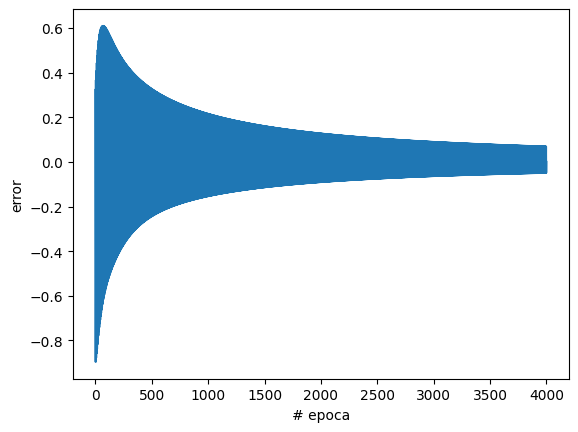

In [8]:
# grafica de del error
plt.xlabel('# epoca')
plt.ylabel('error')
plt.plot(perceptron_and.errores)
print('Error final:', perceptron_and.errores[-1])

prediccion

In [9]:
print(perceptron_and.prediction([0, 0])) # valor esperado 0
print(perceptron_and.prediction([1, 0])) # valor esperado 0
print(perceptron_and.prediction([1, 1])) # valor esperado 1
print(perceptron_and.prediction([0, 1])) # valor esperado 0

0.00018928955680064068
0.048438385382057234
0.931514232791285
0.04815184876924867


#### Entrenamiento para predecir ESPECIES DE FLORES - IRIS

In [10]:
# leer el archivo .csv y seleccionar las 2 ultimas columnas
iris_df = pd.read_csv('dataset/Iris.csv')
iris_df = iris_df[iris_df['Species'] != 'Iris-setosa' ][['PetalLengthCm', 'PetalWidthCm', 'Species']]

# normalizar el tag: Iris-versicolor y Iris-virginica a 0 y 1 respectivamente
iris_df['Species'] = iris_df['Species'].apply(lambda specie: 0 if specie=='Iris-versicolor' else 1)
iris_df

,PetalLengthCm,PetalWidthCm,Species
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [11]:
# convertir el dataframe a un arreglo para el entrenamiento
iris_arr = iris_df.to_numpy(dtype=float)

# separamos el dataset en dos grupos para entrenamiento y el de testeo de 5 filas
n = 10
indices = np.random.choice(iris_arr.shape[0], n, replace=False)
iris_arr_test = iris_arr[indices, :]
iris_arr_train = np.delete(iris_arr, indices, axis=0)

# imprimimos las dimensiones
print('iris train : ', iris_arr_train.shape)
print('iris test : ')
print(iris_arr_test)

iris train :  (90, 3)
iris test : 
[[4.  1.2 0. ]
 [5.7 2.3 1. ]
 [4.1 1.  0. ]
 [6.6 2.1 1. ]
 [4.7 1.4 0. ]
 [3.  1.1 0. ]
 [5.4 2.1 1. ]
 [4.6 1.3 0. ]
 [5.6 2.2 1. ]
 [5.9 2.3 1. ]]


In [12]:
# creacion del modelo y entrenamiento
perceptron_iris = Perceptron(2)
perceptron_iris.fit(iris_arr_train, epoch=1000, alfa=0.1, funcAct=sigmoide)

(array([ 2.5024233 , 13.10680468]), -29.965430615777016)

Error final: 0.0016853783930753652


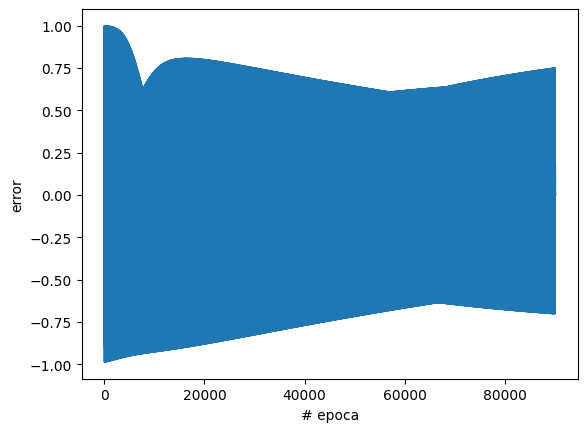

In [13]:
# grafica de del error
plt.xlabel('# epoca')
plt.ylabel('error')
plt.plot(perceptron_iris.errores)
print('Error final:', perceptron_iris.errores[-1])

Predicciones

In [14]:
print('dato\t\tesperado\tprediccion\t\terror')
for row in iris_arr_test:
    tmp = perceptron_iris.prediction(row[:2])
    err = 'x' if abs(tmp-row[-1]) > 0.4 else ''
    print(f'{row[:2]} \t{row[-1]} \t\t{tmp} \t{err}') 

dato		esperado	prediccion		error
[4.  1.2] 	0.0 		0.014378026325842296 	
[5.7 2.3] 	1.0 		0.9999994666209482 	
[4.1 1. ] 	0.0 		0.0013602978088627811 	
[6.6 2.1] 	1.0 		0.9999992284418311 	
[4.7 1.4] 	0.0 		0.5363073451685091 	x
[3.  1.1] 	0.0 		0.00032198757388272767 	
[5.4 2.1] 	1.0 		0.9999844579387653 	
[4.6 1.3] 	0.0 		0.1953778602271342 	
[5.6 2.2] 	1.0 		0.9999974594061574 	
[5.9 2.3] 	1.0 		0.9999996766459387 	


Los resultados varian segun los ejemplos que le toque predecir, en este caso son aleatorios asi que puede q aveces tenga de 1 a 0 errores y en otros hasta 5 errores